# Homework 7: Stats and Modeling

## Larry Qu

## Step 2

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Mean: 5.08317651486639
Median: 2.0
Mode: 0    1
dtype: int64
Trimmed mean after removing bottom and top 10%: [2.44663846]


<AxesSubplot:ylabel='Frequency'>

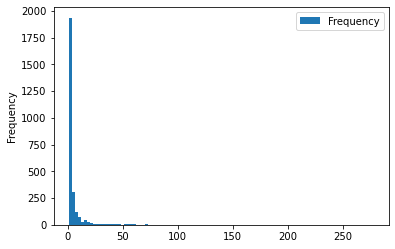

In [26]:
import requests
import pandas as pd
import nltk
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
from nltk.probability import FreqDist
from nltk.stem.lancaster import LancasterStemmer
from scipy import stats


#Shakespeare word frequency

#get the text for Romeo and Juliet
response = requests.get("http://shakespeare.mit.edu/romeo_juliet/full.html")
document = BeautifulSoup(response.text, "html.parser")
text = ""
for doc in document.find_all('blockquote'):
    text += (doc.text.strip())
    text += (" ")
#print(text)
    
#tokenize the words
sent = sent_tokenize(text)
words = []
for s in sent:
    for w in word_tokenize(s):
        words.append(w)
#print(len(words))
#print(words)
        
#remove stopwords
myStopWords = list(punctuation) + stopwords.words('english')
wordsNoStop = []
for i in words:
    if i.lower() not in myStopWords:
        wordsNoStop.append(i)
#print(wordsNoStop)
#print(myStopWords)

wordStems = [LancasterStemmer().stem(w) for w in wordsNoStop]

freq = FreqDist(wordStems)
#for j in sorted(freq, key=freq.get, reverse=True)[:20]:
    #print(j,freq[j])
    
df = pd.DataFrame.from_dict(freq, orient='index')
df.columns = ['Frequency']
df.index.name = 'Term'
#print(df)
    
print("Mean: " + str(df['Frequency'].mean()))
print("Median: " + str(df['Frequency'].median()))
print("Mode: " + str(df['Frequency'].mode()))
print("Trimmed mean after removing bottom and top 10%: " + str(stats.trim_mean(df, 0.1))    )

df.plot(kind='hist',
        y='Frequency', bins=100, range=[df['Frequency'].min(), df['Frequency'].max()])

After removing the top and bottom 10% of the dataset for the trimmed mean, the mean is now 2.4. The untrimmed mean was 5.1. This means that there are many outliers that are very large.

The mean is on the far left side of the frequencies. The median is to the left of the mean. The mode is the farthest to the left. The trimmed mean is greater than the median but less than the untrimmed mean. 

In [32]:
print("Standard deviation: " + str(df['Frequency'].std()) )
print("Interquartile range: " + str(df['Frequency'].quantile(0.75)  - df['Frequency'].quantile(0.25) ) )

Standard deviation: 13.517511762277106
Interquartile range: 3.0


The interquartile range is less than the standard deviation. The standard deviation is higher, since the data is spread out a lot across the mean. However, the middle 50%, the interquartile range, is not very spread out. We can see all this in the histogram.

## Step 3: 

In [1]:
from sklearn import datasets
df = datasets.load_diabetes(as_frame=True) 
features_df = df.data
target_df = df.target

print(df.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
features_df.describe()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [6]:
target_df.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [12]:
for column in features_df:
    print(column, features_df[column].corr(target_df))
    
#bmi has the largest correlation coefficient with the target values

age 0.18788875071891983
sex 0.0430619984516054
bmi 0.5864501344746891
bp 0.4414838489308862
s1 0.2120224810145508
s2 0.17405358696874249
s3 -0.39478925067091847
s4 0.4304528847447734
s5 0.5658834252428094
s6 0.3824834842485812


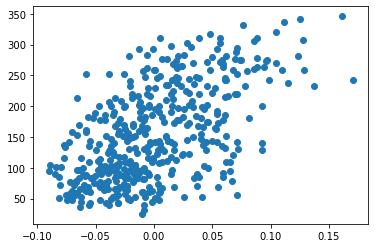

In [15]:
import matplotlib.pyplot as plt
plt.scatter(features_df["bmi"], target_df)


The plotted points match up with the correlation coefficient in that they represent a positive correlation, which is consistent because the correlation coefficient is positive.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
reg = LinearRegression().fit(features_df[["bmi"]], target_df)

print(reg.coef_)

[949.43526038]


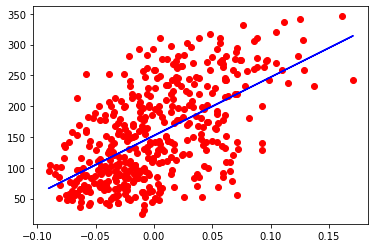

In [21]:
reg.intercept_
X  = features_df[["bmi"]]
y = target_df
ytrain = reg.intercept_ + reg.coef_ * X
plt.plot(X,y,'ro',X,ytrain,'b-');


In [22]:
print("mean squared error: ", mean_squared_error(y, ytrain))


mean squared error:  3890.4565854612724


In [24]:
print("r-squared values: ", r2_score(y, ytrain) )

r-squared values:  0.3439237602253803


In [25]:
reg = LinearRegression().fit(features_df[["age"]], target_df)
X  = features_df[["age"]]
y = target_df
ytrain = reg.intercept_ + reg.coef_ * X
print("mean squared error: ", mean_squared_error(y, ytrain))
print("r-squared values: ", r2_score(y, ytrain) )

mean squared error:  5720.5470172056475
r-squared values:  0.03530218264671636


Doing linear regression with the "age" variable from the features dataframe, the mean squared error increased, and the r-squared values decreased. This is consistent with our findings, since "bmi" has the highest correlation coefficient and thus should have the best mean squared error and r-squared values. 